## AIR QUALITY DATA VISUALISATION

### Rapid API | Weatherbit | Air Quality

The average daily **air quality index _(AQI)_** values were requested from the RapidAPI Air Quality server above, based on coordinates of the following locations within England.

>
> **1.** North East  
> **2.** North West  
> **3.** Yorkshire and The Humber  
> **4.** East Midlands  
> **5.** West Midlands  
> **6.** East of England  
> **7.** London  
> **8.** South East  
> **9.** South West
>

**Import required libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

_**If required, install using:**_

In [4]:
# pip install pandas
# pip install matplotlib
# pip install seaborn

# Then re-run the above cell to import the required libraries.

**Import/read csv files**

In [5]:
# AQI categories according to index values
aqi_categories = pd.read_csv('https://raw.githubusercontent.com/fufu78/CFG-Project/data-analysis-CSV-files/AQI_categories.csv')
aqi_categories

,AQI_Range_Colours,Concern_Levels,Index _Value_Minimum,Index_Value_Maximum
0,Green,Good,0,50
1,Yellow,Moderate,51,100
2,Orange,Unhealthy for Sensitive Groups,101,150
3,Red,Unhealthy,151,200
4,Purple,Very Unhealthy,201,300
5,Maroon,Hazardous,301,500


In [6]:
# Average Air Quality 
air_quality = pd.read_csv('https://raw.githubusercontent.com/fufu78/CFG-Project/data-analysis-CSV-files/Air_quality_data.csv')

air_quality

,location_code,city,aqi_day_average
0,1,Newcastle,34
1,1,Durham,38
2,2,Carlisle,36
3,2,Manchester,27
4,3,Sheffield,39
5,3,York,30
6,4,Nottingham,49
7,4,Leicester,44
8,5,Birmingham,39
9,5,Stafford,39


### Data Visualisation

_**Colour-associated AQI categories according to index values**_

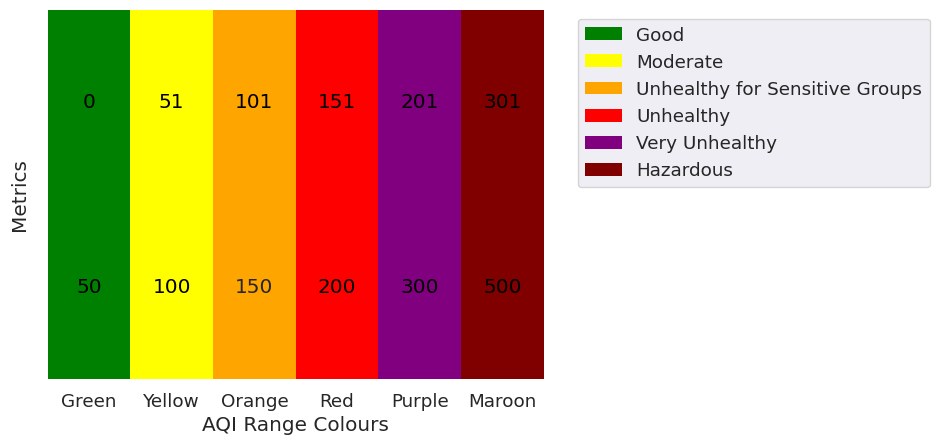

In [7]:
heatmap_data = pd.DataFrame()
for idx, row in aqi_categories.iterrows():
    heatmap_data[row['AQI_Range_Colours']] = [row['Index _Value_Minimum'], row['Index_Value_Maximum']]
    print()

sns.set(font_scale=1.2)
ax = sns.heatmap(heatmap_data, cmap=sns.color_palette(aqi_categories['AQI_Range_Colours']),
                 cbar=False, annot=True, fmt='g', vmin=0, vmax=370)

for idx, colour in enumerate(aqi_categories['AQI_Range_Colours']):
    ax.add_patch(plt.Rectangle((idx, 0), 1, 1, color=colour, label=aqi_categories['Concern_Levels'][idx], linewidth=0))


for text in ax.texts:
    if text.get_text() in ['0', '50', '51', '100', '101', '151', '200', '201', '300', '301', '500']:
        text.set_color('black')
        


# Set the tick labels and axis labels
ax.set_yticklabels(['', ''], rotation=0)
ax.set_xlabel('AQI Range Colours')
ax.set_ylabel('Metrics')

# Set the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
# plt.tight_layout()
plt.show()

_**Average air quality index (AQI) across 9 regions in England**_

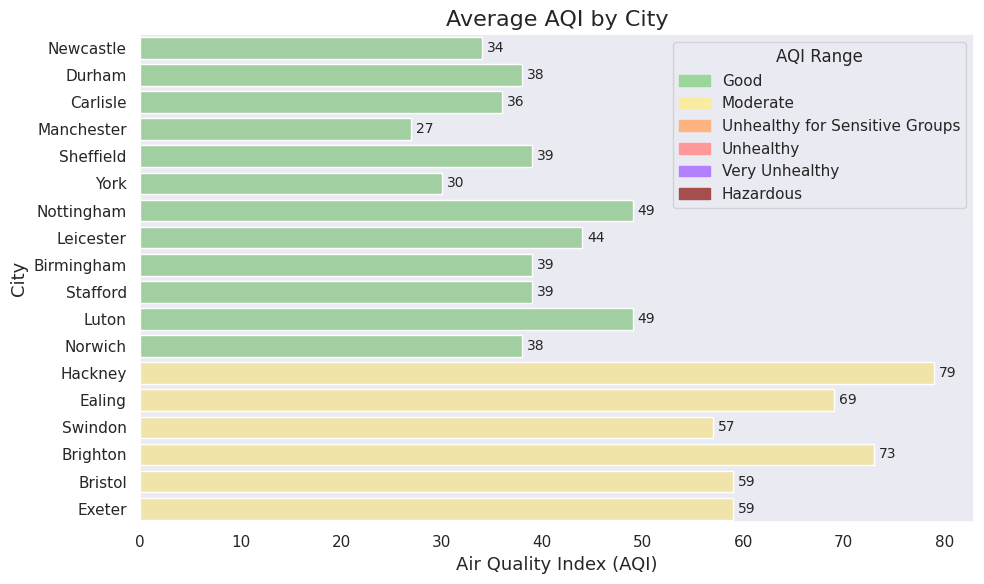

In [22]:
# Set the style
sns.set(style='dark')

# Matched AQI values to the corresponding colour/ranges
colour_mapping = {}
for i in range(len(aqi_categories['AQI_Range_Colours'])):
    colour_mapping[(aqi_categories['Index _Value_Minimum'][i], aqi_categories['Index_Value_Maximum'][i])] = aqi_categories['AQI_Range_Colours'][i]

# Chose colours
pastel_colours = ['#9BD69B', '#FBEBA0', '#FFB380', '#FF9999', '#B380FF', '#A64D4D' ]

#FFA53F = orange
# Created a list of colours for each data point based on its value range
colours = []

for val in air_quality['aqi_day_average']:
  colour_found = False
  for key, colour in colour_mapping.items():
    if key[0] <= val <= key[1]:
      colours.append(pastel_colours[list(aqi_categories['AQI_Range_Colours']).index(colour)])
      colour_found = True
      break
  if not colour_found:
    colours.append('gray')

# Created barchart
axes = sns.barplot(x="aqi_day_average", y="city", data=air_quality, palette=colours, errorbar=None)
for p in axes.patches:
    axes.annotate(format(p.get_width(), '.0f'), (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
                  ha='left', va='center', fontsize=10)

# Set plot size
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Created legend
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colour) for colour in pastel_colours]
plt.legend(handles=legend_elements, labels=list(aqi_categories['Concern_Levels']), title='AQI Range')

# Labelled plot - title and axes
plt.title("Average AQI by City", fontsize=16)
plt.xlabel("Air Quality Index (AQI)", fontsize=13)
plt.ylabel("City", fontsize=13)

# To display the plot
plt.tight_layout()
plt.show()

Air Quality Index (AQI) according to city

**AQI Plot 2**

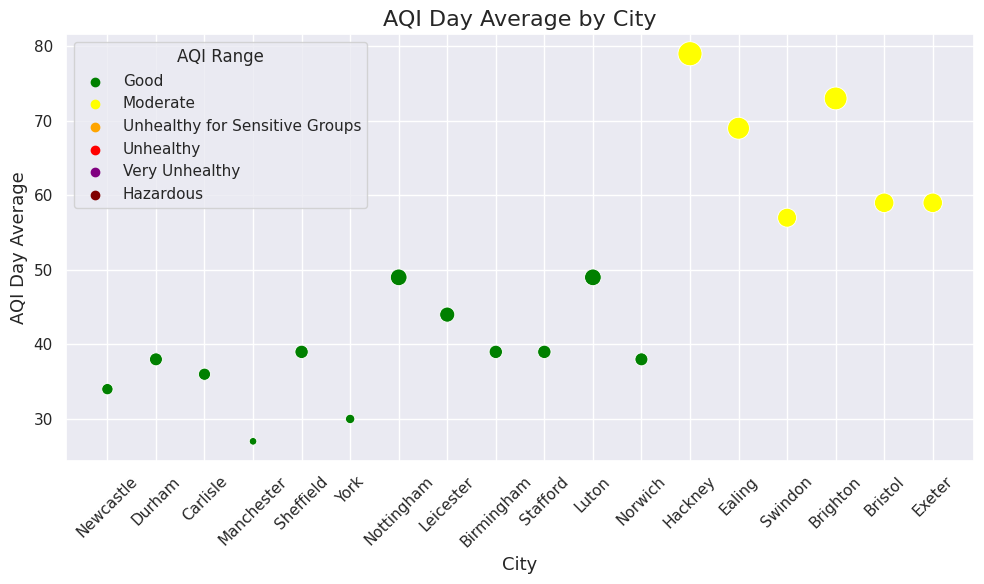

In [21]:
# Matched AQI values to the corresponding colour
def get_aqi_colour(aqi):
    for idx, row in aqi_categories.iterrows():
        if row['Index _Value_Minimum'] <= aqi <= row['Index_Value_Maximum']:
            return row['AQI_Range_Colours']
    return 'Maroon' 

# Created a new 'Colour' column dependent on the AQI value
air_quality['Colour'] = air_quality['aqi_day_average'].apply(get_aqi_colour)

# Set the style
sns.set(style='darkgrid')

# Obtained unique colours from the 'Colour' column
unique_colours = list(air_quality['Colour'].unique())

# Created the bubble plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=air_quality, x='city', y='aqi_day_average', hue='Colour', palette=unique_colours,
                size='aqi_day_average', sizes=(30, 300), legend=False)


# Labelled plot - title and axes
plt.title('AQI Day Average by City', fontsize=16)
plt.xlabel('City', fontsize=13)
plt.ylabel('AQI Day Average', fontsize=13)

# Rotated the city (x-axis) labels for better legibility
plt.xticks(rotation=45)

# Added a corresponding legend
legend_elements = [plt.scatter([], [], color=color, label=label) for color, label in zip(aqi_categories['AQI_Range_Colours'], aqi_categories['Concern_Levels'])]
plt.legend(handles=legend_elements, title='AQI Range')

# To display the plot
plt.tight_layout()
plt.show()
